In [29]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten

In [30]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

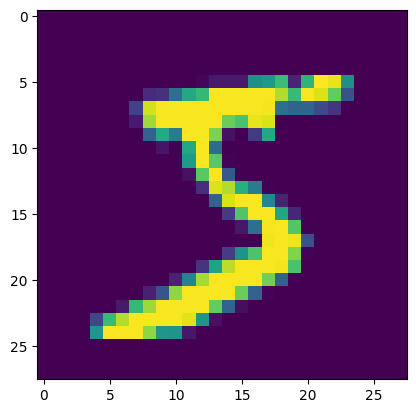

In [31]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [32]:
#convert all the values from the array of X and make them ranging between the 0-1
X_train=X_train/255
X_test=X_test/255 # Scale X_test as well

In [33]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [34]:
model=Sequential()
#we will have to make the 28x28 data flatten into 784 nodes
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9125 - loss: 0.3116 - val_accuracy: 0.9541 - val_loss: 0.1561
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9627 - loss: 0.1287 - val_accuracy: 0.9668 - val_loss: 0.1081
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9771 - loss: 0.0828 - val_accuracy: 0.9702 - val_loss: 0.0964
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9814 - loss: 0.0628 - val_accuracy: 0.9715 - val_loss: 0.0924
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9851 - loss: 0.0495 - val_accuracy: 0.9736 - val_loss: 0.0904
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9884 - loss: 0.0371 - val_accuracy: 0.9737 - val_loss: 0.0872
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9928 - loss: 0.0272 - val_accuracy: 0.9758 - val_loss: 0.0820
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9937 - loss: 0.022

In [39]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [40]:
y_prob

array([[3.68151665e-09, 8.42565684e-10, 1.21339085e-07, ...,
        9.99988496e-01, 5.67253933e-09, 1.11081897e-06],
       [1.16999861e-13, 1.13831975e-05, 9.99988616e-01, ...,
        9.64617912e-18, 2.39001352e-09, 1.62875874e-18],
       [6.81745815e-09, 9.99426484e-01, 6.40690851e-05, ...,
        4.24495811e-04, 6.51209921e-05, 1.47072612e-07],
       ...,
       [1.86139328e-17, 1.43051098e-12, 1.59634926e-16, ...,
        5.29408517e-10, 2.62603606e-10, 9.69146470e-08],
       [1.41848642e-12, 1.40101350e-13, 2.48431131e-13, ...,
        1.91228023e-12, 1.43875673e-06, 4.91637113e-13],
       [1.97062835e-11, 6.77623076e-16, 8.78733808e-10, ...,
        6.17587670e-17, 5.89215024e-14, 1.15645895e-15]], dtype=float32)

In [41]:
y_pred=y_prob.argmax(axis=1)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9775